In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

In [3]:
climate=pd.read_csv('Climate_datasets.csv', index_col='Year')
climate

,Month,Carbon dioxide(ppm),Methane(ppm),Nitrous Oxide,Surface Temperature,Sea Level Variations(mm),Ocean Warming(Zettajoules)
Year,,,,,,,
1990,1,350.12,1714.43,308.651,16.1515,3.50,123
1990,2,352.16,1728.43,308.670,16.1232,3.50,124
1990,3,355.75,1733.82,308.703,16.1412,3.60,123
1990,4,356.63,1737.49,308.601,16.1712,3.60,123
1990,5,357.38,1734.47,308.564,16.1734,3.70,125
...,...,...,...,...,...,...,...
2023,5,424.00,1917.10,337.450,16.9528,98.50,344
2023,6,423.68,1917.11,337.010,16.9282,99.60,343
2023,7,421.83,1918.15,336.230,16.9281,99.89,346


In [4]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 1990 to 2023
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Month                       405 non-null    int64  
 1   Carbon dioxide(ppm)         405 non-null    float64
 2   Methane(ppm)                405 non-null    float64
 3   Nitrous Oxide               405 non-null    float64
 4   Surface Temperature         405 non-null    float64
 5   Sea Level Variations(mm)    405 non-null    float64
 6   Ocean Warming(Zettajoules)  405 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 25.3 KB


In [5]:
climate.describe

<bound method NDFrame.describe of       Month  Carbon dioxide(ppm)  Methane(ppm)  Nitrous Oxide  \
Year                                                            
1990      1               350.12       1714.43        308.651   
1990      2               352.16       1728.43        308.670   
1990      3               355.75       1733.82        308.703   
1990      4               356.63       1737.49        308.601   
1990      5               357.38       1734.47        308.564   
...     ...                  ...           ...            ...   
2023      5               424.00       1917.10        337.450   
2023      6               423.68       1917.11        337.010   
2023      7               421.83       1918.15        336.230   
2023      8               419.68       1918.24        336.320   
2023      9               418.51       1917.13        336.430   

      Surface Temperature  Sea Level Variations(mm)  \
Year                                                  
1990      

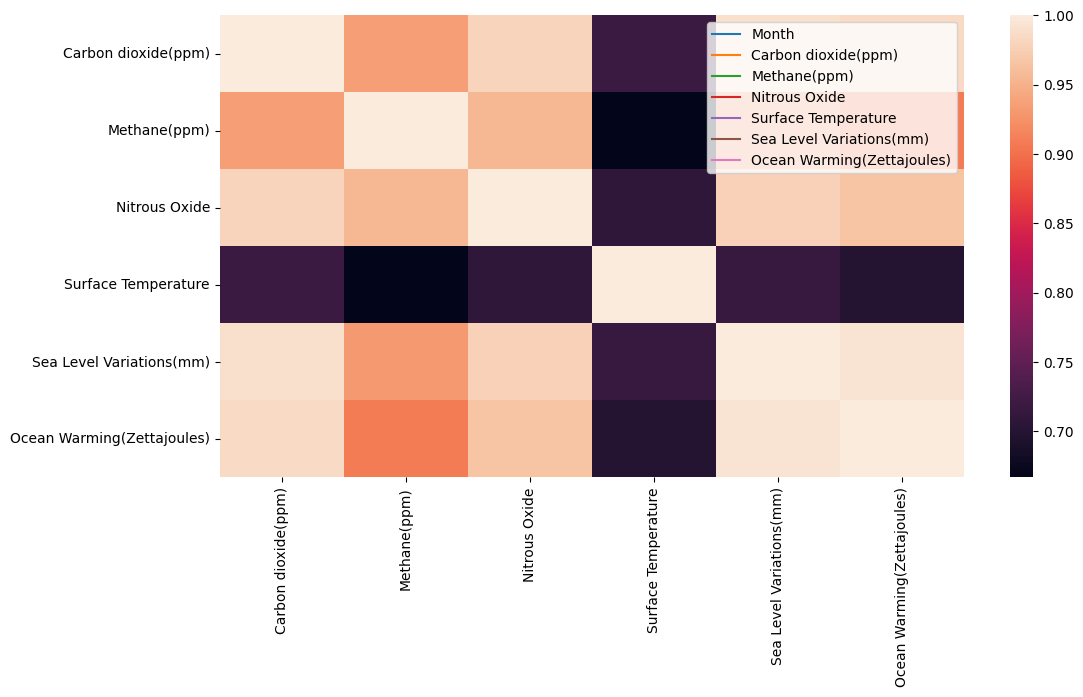

In [7]:
climate.plot(figsize=(12,6))
data=climate.drop(['Month'], axis = 1)
matrix = data.corr()
sns.heatmap(matrix)
plt.show()

<Axes: xlabel='Year'>

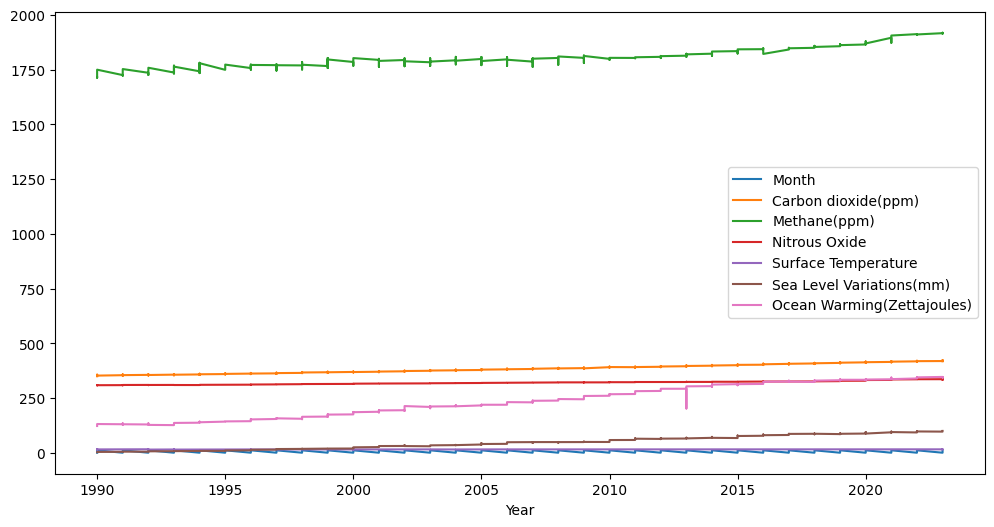

In [8]:
climate.plot(figsize=(12,6))


In [9]:
from sklearn.model_selection import train_test_split
#splitting the data
X = climate.drop(['Carbon dioxide(ppm)','Methane(ppm)', 'Nitrous Oxide', 'Surface Temperature', 'Sea Level Variations(mm)', 'Ocean Warming(Zettajoules)'], axis = 1)
y = climate.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train

,Month
Year,
2019,8
2009,7
1990,4
1991,7
2000,12
...,...
1995,12
1998,11
2012,7


In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# fitting the model
model.fit(X_train, y_train)
LinearRegression()

LinearRegression()

In [11]:
prediction=model.predict(X_test)

In [12]:
np.mean((prediction-y_test)**2)

6438.976420321213

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
mse = mean_squared_error(y_test, prediction)
rmse =np.sqrt(mse)
print('MSE=',mse)
print('RMSE=',rmse)

MSE= 6438.976420321213
RMSE= 80.24323286309702


In [16]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=1)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [17]:
prediction2=regressor.predict(X_test)
np.mean((prediction2-y_test)**2)

6731.994208285184

In [18]:
mse = mean_squared_error(y_test, prediction2)
rmse =np.sqrt(mse)
print('MSE=',mse)
print('RMSE=',rmse)

MSE= 6731.994208285184
RMSE= 82.04873069271203


In [19]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=50, random_state=3, n_estimators=100)
regr.fit(X_train,y_train)

RandomForestRegressor(max_depth=50, random_state=3)

In [20]:
prediction3=regr.predict(X_test)
np.mean((prediction3-y_test)**2)

6709.070737136407

In [21]:
import sklearn
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, prediction3)
rmse =np.sqrt(mse)
print('MSE=',mse)
print('RMSE=',rmse)

MSE= 6709.070737136407
RMSE= 81.90891732367366


In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.fit(X_train, y_train)
train= model.predict(X_test)




3/3 [==============================] - 0s 6ms/step


In [31]:
import sklearn
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, prediction4)
rmse =np.sqrt(mse)
print('MSE=',mse)
print('RMSE=',rmse)


MSE= 57807.22165125065
RMSE= 240.43132418894726


In [33]:
model.fit(X_train, y_train)
prediction4= model.predict(X_test)

3/3 [==============================] - 0s 6ms/step


In [34]:
import sklearn
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, prediction4)
rmse =np.sqrt(mse)
print('MSE=',mse)
print('RMSE=',rmse)

MSE= 57284.84931794796
RMSE= 239.3425355383952


In [32]:
prediction4=regr.predict(X_test)
np.mean((prediction4-y_test)**2)

6709.070737136407

In [35]:
model.fit(X_train, y_train)
prediction4= model.predict(X_test)

3/3 [==============================] - 0s 5ms/step


In [39]:
import sklearn
from sklearn.metrics import mean_squared_error
from math import sqrt
mse1 = mean_squared_error(y_train, prediction4)
rmse1 =np.sqrt(mse1)
print('RMSE1',rmse1)
mse = mean_squared_error(y_test, prediction4)
rmse =np.sqrt(mse)
print('MSE=',mse)
print('RMSE=',rmse)

ValueError: ignored

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [41]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
from sklearn.model_selection import train_test_split
#splitting the data
X = climate.drop(['Carbon dioxide(ppm)','Methane(ppm)', 'Nitrous Oxide', 'Surface Temperature', 'Sea Level Variations(mm)', 'Ocean Warming(Zettajoules)'], axis = 1)
y = climate.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train

,Month
Year,
2019,8
2009,7
1990,4
1991,7
2000,12
...,...
1995,12
1998,11
2012,7


In [45]:
model.fit(X_train, y_train)



11/11 [==============================] - 0s 13ms/step - loss: 61486.7148


In [46]:
trainPredict=model.predict(X_train)
testPredict=model.predict(X_test)

3/3 [==============================] - 0s 6ms/step


In [50]:
trainScore=np.sqrt(mean_squared_error(y_train, trainPredict))
print('Train Score:%.2f RMSE' % (trainScore))
testScore=np.sqrt(mean_squared_error(y_test, testPredict))
print('Test Score:%.2f RMSE' % (testScore))

Train Score:247.83 RMSE
Test Score:240.84 RMSE


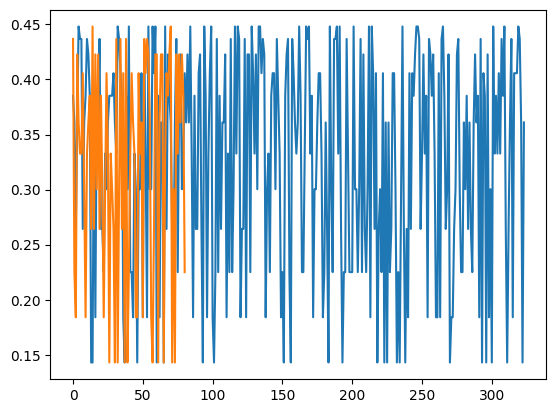

In [52]:
plt.plot(trainPredict)
plt.plot(testPredict)
plt.show()